In [1]:
#This notebook contains the regression analysis work for the NYC rent dataframe

import pandas as pd
import numpy as np
import ast
import json
from datetime import datetime
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
plt.style.use('seaborn')

In [2]:
#This line reads in the main dataframe
df = pd.read_csv('neighfinal_listing_dataframe.csv', engine='python')

In [15]:
#This block of code renames the column titles so that they can be used by the ols regression function

df.rename(columns={'Bedford-Stuyvesant':'BedStuy'}, inplace=True)
df.rename(columns={'Stuyvesant_Town_-_Peter_Cooper_Village': 'StuyTownPCV'}, inplace=True)

In [4]:
#This block of code cleans any other column name that may have a space in its title

cleaned_dummies = []
for names in list(df.columns)[12:]:
    cleaned_dummies.append(names.replace(' ', '_'))
    
new_column_dict = dict(zip(list(df.columns[12:]), cleaned_dummies))

In [5]:
df = df.rename(columns=new_column_dict)
df

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,median_income,...,Upper_West_Side,Vinegar_Hill,Washington_Heights,Weeksville,West_Village,Williamsburg,Windsor_Terrace,Wingate,Woodside,Yorkville
0,453 Milford Street,1.0,3,Brooklyn,"['Dogs Allowed', 'Dishwasher', 'Microwave', 'C...",0.50,New Lots,2200,0,63700.0,...,0,0,0,0,0,0,0,0,0,0
1,37 King St,1.0,1,Manhattan,"['Elevator', 'Dogs Allowed', 'Dishwasher', 'Ca...",0.06,Hudson Square,4500,0,106056.0,...,0,0,0,0,0,0,0,0,0,0
2,Hudson St,2.0,2,Manhattan,[],0.18,Hudson Square,9395,0,106056.0,...,0,0,0,0,0,0,0,0,0,0
3,600 West 42nd Street,1.0,1,Manhattan,"['Elevator', 'Dogs Allowed', 'Dishwasher', 'Ca...",0.38,Hell's Kitchen,4300,0,93707.0,...,0,0,0,0,0,0,0,0,0,0
4,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Brand New Renovations', 'Dogs Allowed', 'Red...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,0,0,0,0,0,0,0,0,0
5,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Brand New Renovations', 'Dogs Allowed', 'Red...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,0,0,0,0,0,0,0,0,0
6,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Brand New Renovations', 'Dogs Allowed', 'Red...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,0,0,0,0,0,0,0,0,0
7,312 W 58th Street,2.0,4,Manhattan,"['No Fee', 'Laundry In Building', 'Dogs Allowe...",0.08,Hell's Kitchen,7150,1,93707.0,...,0,0,0,0,0,0,0,0,0,0
8,321 W 47th St,2.0,2,Manhattan,"['No Fee', 'Dogs Allowed', 'Dishwasher', 'Expo...",0.17,Hell's Kitchen,3500,0,93707.0,...,0,0,0,0,0,0,0,0,0,0
9,524 West 50th Street,1.0,1,Manhattan,"['Laundry In Building', 'Pre War Laundry On Ev...",0.41,Hell's Kitchen,1999,500,93707.0,...,0,0,0,0,0,0,0,0,0,0


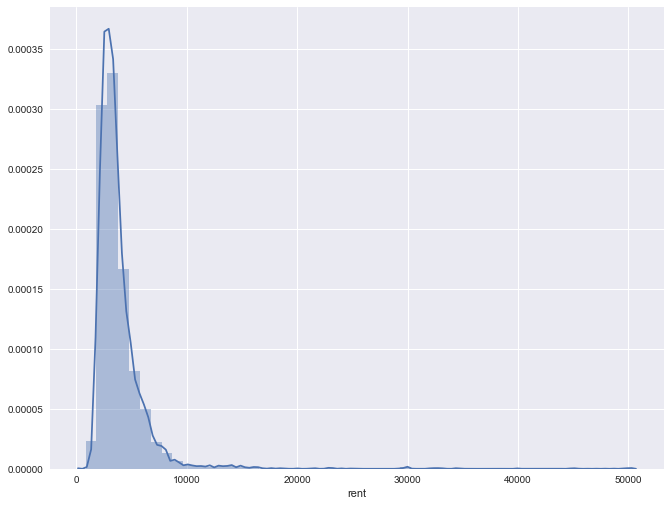

In [6]:
#The following displays the distribution of the asking rents
#The high kurtosis and right-side skewness indicates many outliers above the mean asking rents
fig = pyplot.subplots(figsize=(11,8.5))
sns.distplot(df.rent)

In [7]:
#There are 121 outliers (rents above 10000)
df.loc[df['rent']>10000]

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,median_income,...,Upper_West_Side,Vinegar_Hill,Washington_Heights,Weeksville,West_Village,Williamsburg,Windsor_Terrace,Wingate,Woodside,Yorkville
478,West 57th Street,3.0,4,Manhattan,"['No Fee', 'Dogs Allowed', 'Dishwasher', 'High...",0.58,Hell's Kitchen,14000,0,93707.0,...,0,0,0,0,0,0,0,0,0,0
481,West 57th Street,3.0,4,Manhattan,"['No Fee', 'Dogs Allowed', 'Dishwasher', 'High...",0.58,Hell's Kitchen,14000,0,93707.0,...,0,0,0,0,0,0,0,0,0,0
519,West 57th Street,3.0,4,Manhattan,"['No Fee', 'Dogs Allowed', 'Dishwasher', 'High...",0.61,Hell's Kitchen,14000,0,93707.0,...,0,0,0,0,0,0,0,0,0,0
639,626 1st Avenue,2.0,2,Manhattan,"['No Fee', 'Elevator', 'Laundry In Building', ...",0.53,Murray Hill,12000,0,109250.0,...,0,0,0,0,0,0,0,0,0,0
856,400 West 63rd Street,3.0,3,Manhattan,"['No Fee', 'Elevator', 'Laundry In Building', ...",0.43,Lincoln Square,13330,0,123951.0,...,0,0,0,0,0,0,0,0,0,0
857,400 West 63rd Street,3.0,3,Manhattan,"['No Fee', 'Elevator', 'Laundry In Building', ...",0.43,Lincoln Square,13330,0,123951.0,...,0,0,0,0,0,0,0,0,0,0
885,Broadway,3.0,3,Manhattan,"['Laundry In Building', 'Lounge', 'High Ceilin...",0.07,Lincoln Square,15700,0,123951.0,...,0,0,0,0,0,0,0,0,0,0
889,West 67th Sreet,2.5,3,Manhattan,"['No Fee', 'Elevator', 'Laundry In Building', ...",0.19,Lincoln Square,11000,0,123951.0,...,0,0,0,0,0,0,0,0,0,0
907,W 62nd St,2.5,2,Manhattan,"['No Fee', 'Dogs Allowed', 'Dishwasher', 'High...",0.23,Lincoln Square,15100,0,123951.0,...,0,0,0,0,0,0,0,0,0,0
936,60 Riverside Boulevard,3.0,3,Manhattan,"['Dogs Allowed', 'Cats Allowed', 'Doorman', 'S...",0.46,Lincoln Square,16500,0,123951.0,...,0,0,0,0,0,0,0,0,0,0


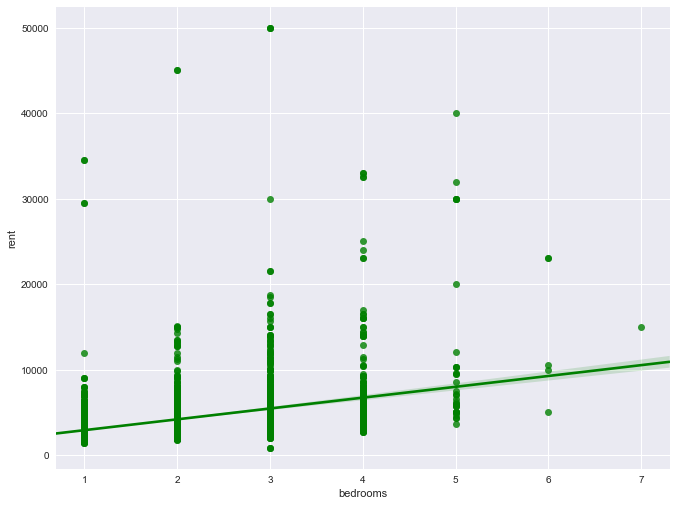

In [8]:
#This scatterplot chart shows the correlation between the asking rent and number of bedrooms

fig, ax = pyplot.subplots(figsize=(11,8.5))
ax = sns.regplot(x= 'bedrooms', y='rent', data = df, color = 'green')

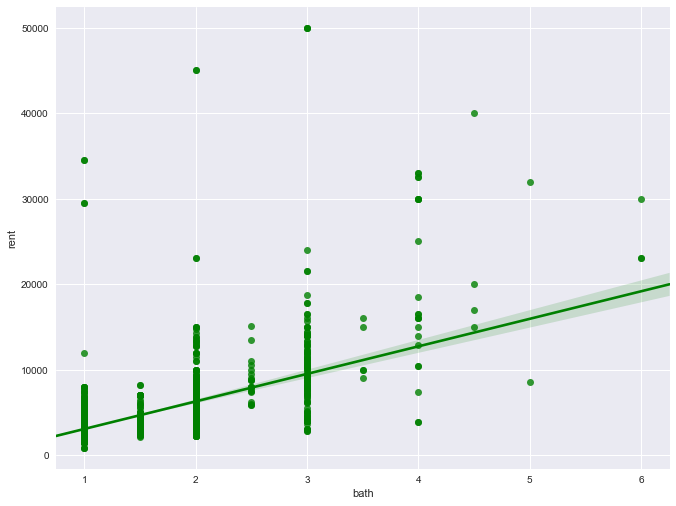

In [9]:
#A correlation plot of bathrooms in the listing and asking rents

fig, ax = pyplot.subplots(figsize=(11,8.5))
ax = sns.regplot(x= 'bath', y='rent', data = df, color = 'green')

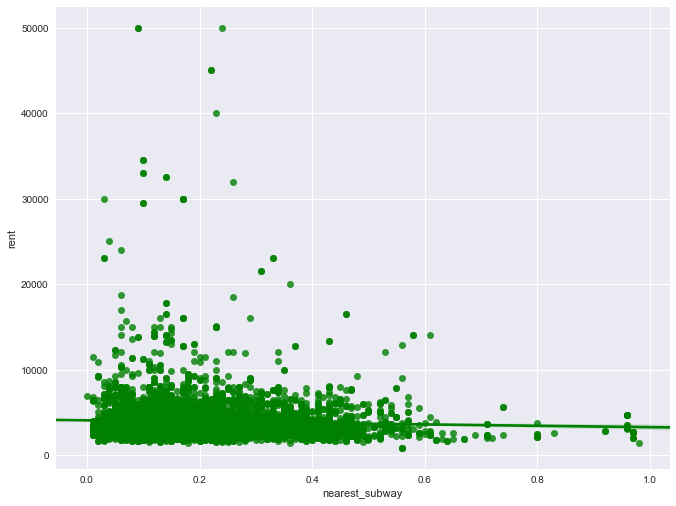

In [10]:
#A correlation plot of asking rents and nearest subways

fig, ax = pyplot.subplots(figsize=(11,8.5))
ax = sns.regplot(x= 'nearest_subway', y='rent', data = df, color = 'green')

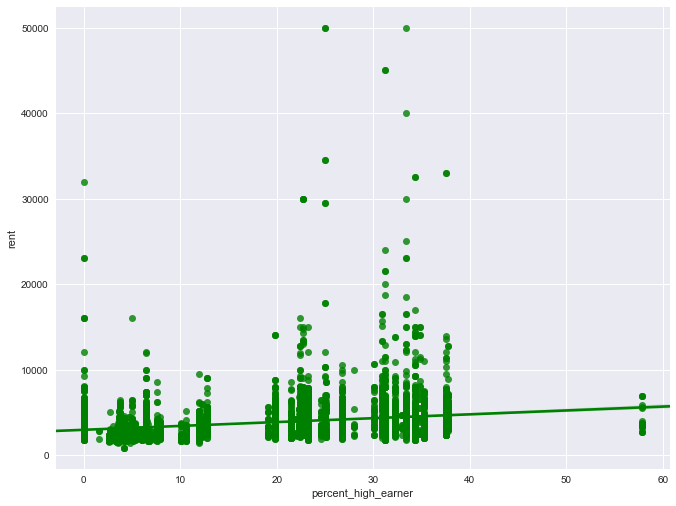

In [11]:
#A correlation plot of residents earning more than $200k per annum and asking rents

fig, ax = pyplot.subplots(figsize=(11,8.5))
ax = sns.regplot(x= 'percent_high_earner', y='rent', data = df, color = 'green')

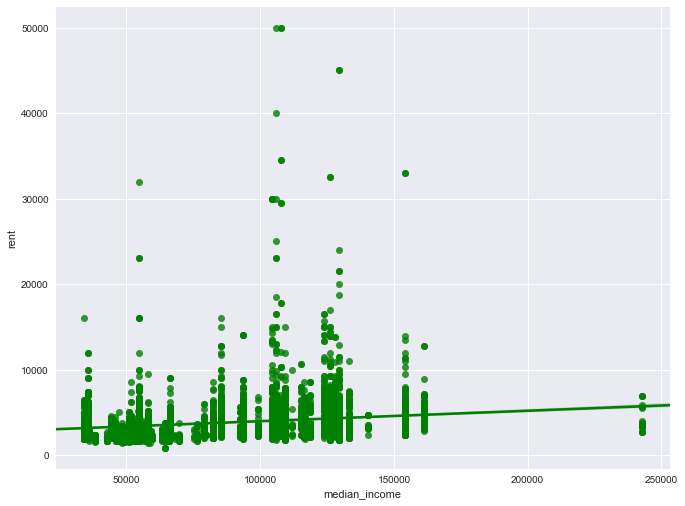

In [12]:
#A correlation plot of residents' median income and asking rents
fig, ax = pyplot.subplots(figsize=(11,8.5))
ax = sns.regplot(x= 'median_income', y='rent', data = df, color = 'green')

In [13]:
#This block of code creates a string that can be copied and pasted into the ols prompt

dummy = ''
for names in new_column_dict.values():
    dummy += names
    dummy += '+'
dummy

"Cats_Allowed+Elevator+No_Fee+Dogs_Allowed+Laundry_In_Building+Doorman+Gym+Dishwasher+Hardwood_Floors+Renovated+Common_Outdoor_Space+High_Ceilings+Laundry_In_Unit+Granite_Kitchen+Marble_Bath+Parking+Pre_War+Valet+Eat_In_Kitchen+Walk_In_Closet+Deck+Lounge+Concierge+Storage_Facility+High_Speed_Internet+Studio+Brooklyn+Manhattan+Queens+Alphabet_City+Arverne+Astoria+Battery_Park_City+Bay_Ridge+BedStuy+Bensonhurst+Beverley_Square_East+Boerum_Hill+Borough_Park+Bowery+Briarwood+Brooklyn_Heights+Bushwick+Carnegie_Hill+Carroll_Gardens+Central_Harlem+Central_Park+Central_Slope+Chelsea+Chinatown+Civic_Center+Clinton_Hill+Cobble_Hill+Crown_Heights+DUMBO+Ditmars+Downtown_Brooklyn+Downtown_Flushing+East_Flatbush+East_Harlem+East_Village+East_Williamsburg+Elmhurst+Financial_District+Flatbush+Flatiron_District+Flushing+Forest_Hills+Fort_George+Fort_Greene+Garment_District+Glendale+Governors_Island+Gowanus+Gramercy_Park+Gravesend+Greenpoint+Greenwich_Village+Greenwood_Heights+Hamilton_Heights+Hell's_Ki

In [16]:
#For some reason you must run the third cell again if the output of this cell is an error

#This line creates the first ols regression with all the columns (less one dummy per category so a default can be created)

from statsmodels.formula.api import ols

lr_model = ols(formula='rent~bath+Queens+Brooklyn+bedrooms+Elevator+No_Fee+Dogs_Allowed+Laundry_In_Building+Doorman+Gym+Dishwasher+Hardwood_Floors+Renovated+Common_Outdoor_Space+High_Ceilings+Laundry_In_Unit+Granite_Kitchen+Marble_Bath+Parking+Pre_War+Valet+Eat_In_Kitchen+Walk_In_Closet+Deck+Lounge+Concierge+Storage_Facility+High_Speed_Internet+Studio+Brooklyn+Manhattan+Queens+Alphabet_City+Arverne+Astoria+Battery_Park_City+Bay_Ridge+BedStuy+Bensonhurst+Beverley_Square_East+Boerum_Hill+Borough_Park+Bowery+Briarwood+Brooklyn_Heights+Bushwick+Carnegie_Hill+Carroll_Gardens+Central_Harlem+Central_Park+Central_Slope+Chelsea+Chinatown+Civic_Center+Clinton_Hill+Cobble_Hill+Crown_Heights+DUMBO+Ditmars+Downtown_Brooklyn+Downtown_Flushing+East_Flatbush+East_Harlem+East_Village+East_Williamsburg+Elmhurst+Financial_District+Flatbush+Flatiron_District+Flushing+Forest_Hills+Fort_George+Fort_Greene+Garment_District+Glendale+Governors_Island+Gowanus+Gramercy_Park+Gravesend+Greenpoint+Greenwich_Village+Greenwood_Heights+Hamilton_Heights+Hudson_Heights+Hudson_Square+Hunters_Point+Inwood+Jackson_Heights+Jamaica+Kensington+Kew_Gardens+Kew_Gardens_Hills+Kips_Bay+Koreatown+Lenox_Hill+Lincoln_Square+Little_Italy+Long_Island_City+Lower_East_Side+Madison+Manhattan_Valley+Manhattanville+Marble_Hill+Middle_Village+Midtown_East+Midwood+Morningside_Heights+Murray_Hill+New_Lots+NoHo+NoLita+NoMad+North_Slope+Ocean_Hill+Prospect_Heights+Prospect_Lefferts_Gardens+Rego_Park+Ridgewood+Roosevelt_Island+Rose_Hill+SoHo+South_Corona+South_Slope+Steinway+StuyTownPCV+Sunnyside+Sunset_Park+Sutton_Place+Theater_District+Tribeca+Turtle_Bay+Two_Bridges+Upper_East_Side+Upper_West_Side+Vinegar_Hill+Washington_Heights+Weeksville+West_Village+Williamsburg+Windsor_Terrace+Wingate+Woodside+Yorkville', data=df).fit()


In [17]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     51.41
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:08:12   Log-Likelihood:                -57960.
No. Observations:                6483   AIC:                         1.162e+05
Df Residuals:                    6343   BIC:                         1.171e+05
Df Model:                         139                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -697.2222    153.127     -4.553      0.000    -997.403    -397.041
bath                       2546.9217     59.878     42.536      0.000    2429.542    2664.302
Queens                     -671.0619    392.613     -1.709      0.087   -1440.715      98.591
Brooklyn                   -362.5178    164.886     -2.199      0.028    -685.750     -39.286
bedrooms                    414.7452     36.510     11.360      0.000     343.173     486.317
Elevator                    502.0385     75.246      6.672      0.000     354.531     649.546
No_Fee                      -86.3570     58.920     -1.466      0.143    -201.860      29.146
Dogs_Allowed                163.2475     53.689      3.041      0.002      57.999     268.496
Laundry_In_Building        -449.3133     65.688     -6.840      0.000    -578.084    -320.543
Doorman                     659.8567     82.988      7.951      0.000     497.172     822.541
Gym                         -15.1961     81.461     -0.187      0.852    -174.887     144.495
Dishwasher                  -64.9449     67.362     -0.964      0.335    -196.996      67.106
Hardwood_Floors              21.7654     89.064      0.244      0.807    -152.830     196.360
Renovated                  -149.0442     82.097     -1.815      0.070    -309.982      11.894
Common_Outdoor_Space       -252.6012     79.970     -3.159      0.002    -409.370     -95.832
High_Ceilings               -17.2256     81.570     -0.211      0.833    -177.129     142.678
Laundry_In_Unit             289.3818     59.639      4.852      0.000     172.469     406.294
Granite_Kitchen              49.4928     98.522      0.502      0.615    -143.643     242.629
Marble_Bath                 -30.5364     98.587     -0.310      0.757    -223.800     162.727
Parking                    -149.1613     81.078     -1.840      0.066    -308.102       9.779
Pre_War                      21.9030     70.451      0.311      0.756    -116.205     160.011
Valet                      -261.0471    104.679     -2.494      0.013    -466.253     -55.842
Eat_In_Kitchen              -70.4933     85.785     -0.822      0.411    -238.661      97.675
Walk_In_Closet             -104.5646     86.626     -1.207      0.227    -274.382      65.252
Deck                        202.7765    108.247      1.873      0.061      -9.425     414.978
Lounge                      229.4122    101.866      2.252      0.024      29.721     429.103
Concierge                   -86.5947     96.453     -0.898      0.369    -275.676     102.486
Storage_Facility             -0.7627     96.693     -0.008      0.994    -190.314     188.789
High_Speed_Internet         117.0241    109.957      1.064      0.287     -98.530     332.578
Studio                     -618.8735     67.780     -9.131      0.000    -7

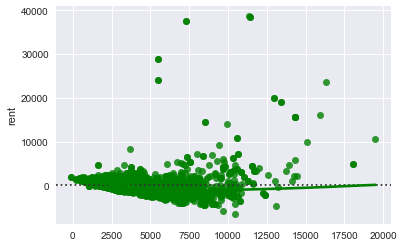

In [18]:
x = lr_model.predict()

y = df.rent

sns.residplot(x, y, lowess=True, color="g")

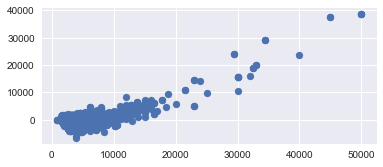

In [19]:
# checking for our model - Homoscedasticity
pred_val = x
true_val = y
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(df['rent'],residual)

((array([-3.70209812, -3.47074294, -3.34342775, ...,  3.34342775,
          3.47074294,  3.70209812]),
  array([-6527.81355601, -5789.88116209, -4607.18775297, ...,
         38580.63897016, 38580.63897016, 38668.80125754])),
 (1278.7414667456508, 1.1815891777178767e-11, 0.6918951028380346))

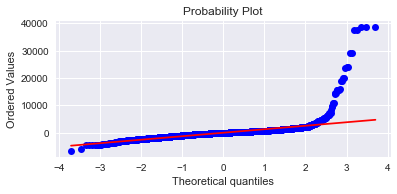

In [20]:
import scipy as sp

# checking for normality - QQ plot 
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(residual, plot=ax, fit=True)


In [21]:
#I remove any coefficients deemed insignifficant at the 95% confidence interval
#The R-squared may be lower but the difference between R-Squared and adjusted R-Squared is smaller

nlr_model = ols(formula='rent~bath+bedrooms+Elevator+No_Fee+percent_high_earner+Dogs_Allowed+Laundry_In_Building+Doorman+Common_Outdoor_Space+Laundry_In_Unit+Parking+Valet+Lounge+Studio+Bushwick+Chelsea+Flatiron_District+Gramercy_Park+Greenwich_Village+Hamilton_Heights+Hudson_Heights+Lenox_Hill+Lincoln_Square+Madison+Marble_Hill+NoLita+SoHo+Theater_District+Tribeca+Washington_Heights+West_Village+Wingate', data=df).fit()
nlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:08:18   Log-Likelihood:                -58068.
No. Observations:                6483   AIC:                         1.162e+05
Df Residuals:                    6450   BIC:                         1.164e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -931.9580     88.734    -10.503      0.000   -1105.906    -758.010
bath                  2586.8683     58.444     44.263      0.000    2472.299    2701.437
bedrooms               385.6595     35.087     10.992      0.000     316.877     454.442
Elevator               493.7222     73.090      6.755      0.000     350.442     637.003
No_Fee                -167.5455     54.942     -3.049      0.002    -275.251     -59.840
percent_high_earner     26.5530      2.310     11.495      0.000      22.025      31.081
Dogs_Allowed           135.2403     51.375      2.632      0.008      34.529     235.952
Laundry_In_Building   -491.0818     63.553     -7.727      0.000    -615.667    -366.496
Doorman                666.1326     73.971      9.005      0.000     521.125     811.140
Common_Outdoor_Space  -224.5798     65.666     -3.420      0.001    -353.308     -95.852
Laundry_In_Unit        311.5283     56.224      5.541      0.000     201.310     421.746
Parking               -186.1157     75.370     -2.469      0.014    -333.866     -38.366
Valet                 -226.2475     84.630     -2.673      0.008    -392.151     -60.344
Lounge                 255.2908     89.950      2.838      0.005      78.958     431.623
Studio                -612.2438     66.744     -9.173      0.000    -743.084    -481.404
Bushwick              -610.5067    141.728     -4.308      0.000    -888.342    -332.672
Chelsea                821.5913    145.649      5.641      0.000     536.071    1107.111
Flatiron_District      979.3810    379.474      2.581      0.010     235.487    1723.275
Gramercy_Park          416.6507    189.710      2.196      0.028      44.756     788.546
Greenwich_Village     1464.4577    217.911      6.720      0.000    1037.280    1891.636
Hamilton_Heights      -832.0919    292.836     -2.841      0.005   -1406.148    -258.035
Hudson_Heights       -1178.3372    337.836     -3.488      0.000   -1840.609    -516.066
Lenox_Hill            1092.8532    373.007      2.930      0.003     361.635    1824.072
Lincoln_Square         738.8964    187.372      3.943      0.000     371.585    1106.208
Madison              -3170.2874   1334.000     -2.377      0.018   -5785.370    -555.205
Marble_Hill          -2980.3814   1333.352     -2.235      0.025   -5594.194    -366.569
NoLita                 766.6812    290.273      2.641      0.008     197.650    1335.712
SoHo                  3680.3469    422.685      8.707      0.000    2851.744    4508.950
Theater_District      1528.0383    154.388      9.897      0.000    1225.386    1830.690
Tribeca               1671.3153    174.917      9.555      0.000    1328.421    2014.210
Washington_Heights    -862.7438    303.663     -2.841      0.005   -1458.025    -267.463
West_Village           746.2118    161.585      4.618    

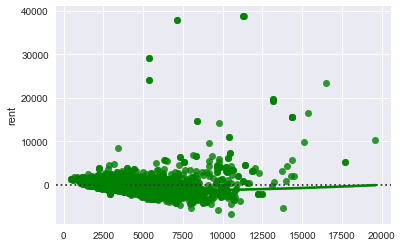

In [22]:
x = nlr_model.predict()

y = df.rent

sns.residplot(x, y, lowess=True, color="g")

In [23]:
bathbed_to_rent = ols(formula='rent~bath+bedrooms', data=df).fit()
bathbed_to_rent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     2191.
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:08:21   Log-Likelihood:                -58732.
No. Observations:                6483   AIC:                         1.175e+05
Df Residuals:                    6480   BIC:                         1.175e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -268.7420     68.440     -3.927      0.000    -402.906    -134.578
bath        2951.4294     61.870     47.704      0.000    2830.144    3072.715
bedrooms     249.3586     34.939      7.137      0.000     180.867     317.850
==============================================================================
Omnibus:                     9602.040   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5619045.328
Skew:                           8.875   Prob(JB):                         0.00
Kurtosis:                     146.131   Cond. No.                         8.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

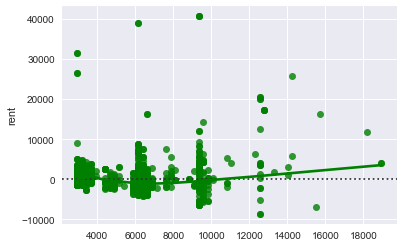

In [24]:
x = bathbed_to_rent.predict()

y = df.rent

sns.residplot(x, y, lowess=True, color="g")

In [25]:
df.corr()

,bath,bedrooms,nearest_subway,rent,sqft,median_income,percent_high_earner,zipcode,Cats_Allowed,Elevator,...,Upper_West_Side,Vinegar_Hill,Washington_Heights,Weeksville,West_Village,Williamsburg,Windsor_Terrace,Wingate,Woodside,Yorkville
bath,1.000000,0.611548,0.031879,0.631443,-0.111591,-0.010716,-0.000704,0.025981,0.018575,0.054063,...,0.052611,0.007954,0.002102,-0.016246,-0.015936,0.020862,-0.007351,0.028365,-0.019422,0.051430
bedrooms,0.611548,1.000000,0.024361,0.440341,-0.143305,-0.102151,-0.083911,-0.013456,-0.000150,-0.105670,...,-0.000407,-0.014586,0.077837,0.012888,-0.030405,-0.012178,0.002841,0.012588,-0.003209,-0.013939
nearest_subway,0.031879,0.024361,1.000000,-0.039027,-0.027901,-0.159763,-0.184529,0.090241,0.000734,-0.022942,...,-0.086595,0.016741,-0.025563,0.030974,-0.071390,0.097146,-0.000762,0.053474,0.016866,0.006696
rent,0.631443,0.440341,-0.039027,1.000000,-0.049523,0.168544,0.198312,-0.122962,0.039861,0.157075,...,0.059180,0.004430,-0.031139,-0.022284,0.035630,-0.003118,-0.008871,-0.014300,-0.026640,0.003707
sqft,-0.111591,-0.143305,-0.027901,-0.049523,1.000000,0.029346,0.024787,0.015355,0.085621,0.070801,...,-0.007896,-0.006419,0.001499,-0.012013,0.001284,-0.012430,0.005039,-0.010151,-0.014362,-0.016137
median_income,-0.010716,-0.102151,-0.159763,0.168544,0.029346,1.000000,0.958255,-0.496464,0.064115,0.272039,...,0.161153,0.010321,-0.088375,-0.051973,0.136342,-0.097265,0.019712,-0.034833,-0.042024,-0.222982
percent_high_earner,-0.000704,-0.083911,-0.184529,0.198312,0.024787,0.958255,1.000000,-0.630634,0.070573,0.264617,...,0.216167,0.008815,-0.105373,-0.049262,0.145630,-0.086575,0.010367,-0.042099,-0.058560,-0.365316
zipcode,0.025981,-0.013456,0.090241,-0.122962,0.015355,-0.496464,-0.630634,1.000000,-0.050103,-0.146425,...,-0.101877,0.016216,-0.041358,0.031653,-0.083247,0.118274,0.030919,0.025714,0.044858,0.777657
Cats_Allowed,0.018575,-0.000150,0.000734,0.039861,0.085621,0.064115,0.070573,-0.050103,1.000000,0.138946,...,0.007890,0.013066,0.017468,0.014645,0.021710,0.016381,0.014645,0.020663,-0.020014,-0.090479
Elevator,0.054063,-0.105670,-0.022942,0.157075,0.070801,0.272039,0.264617,-0.146425,0.138946,1.000000,...,0.009260,0.013683,-0.007703,-0.042210,-0.053334,-0.006352,-0.022833,-0.035668,-0.050462,-0.049711


In [26]:
#An ols regression with bathrooms and bedrooms multiplied together

import statsmodels.formula.api as smf
bed_bath_interraction = smf.ols('rent ~ bath+bedrooms+bath*bedrooms+Studio+nearest_subway+percent_high_earner+median_income+percent_high_earner*median_income+Cats_Allowed+Dogs_Allowed+Cats_Allowed*Dogs_Allowed+Elevator+No_Fee+Queens+Brooklyn+Alphabet_City+Arverne+Astoria+Battery_Park_City+Bay_Ridge+BedStuy+Bensonhurst+Beverley_Square_East+Boerum_Hill+Borough_Park+Bowery+Briarwood+Brooklyn_Heights+Bushwick+Carnegie_Hill+Carroll_Gardens+Central_Harlem+Central_Park+Central_Slope+Chelsea+Chinatown+Civic_Center+Clinton_Hill+Cobble_Hill+Crown_Heights+DUMBO+Ditmars+Downtown_Brooklyn+Downtown_Flushing+East_Flatbush+East_Harlem+East_Village+East_Williamsburg+Elmhurst+Financial_District+Flatbush+Flatiron_District+Flushing+Forest_Hills+Fort_George+Fort_Greene+Garment_District+Glendale+Governors_Island+Gowanus+Gramercy_Park+Gravesend+Greenpoint+Greenwich_Village+Greenwood_Heights+Hamilton_Heights+Hudson_Heights+Hudson_Square+Hunters_Point+Inwood+Jackson_Heights+Jamaica+Kensington+Kew_Gardens+Kew_Gardens_Hills+Kips_Bay+Koreatown+Lenox_Hill+Lincoln_Square+Little_Italy+Long_Island_City+Lower_East_Side+Madison+Manhattan_Valley+Manhattanville+Marble_Hill+Middle_Village+Midtown_East+Midwood+Morningside_Heights+Murray_Hill+New_Lots+NoHo+NoLita+NoMad+North_Slope+Ocean_Hill+Prospect_Heights+Prospect_Lefferts_Gardens+Rego_Park+Ridgewood+Roosevelt_Island+Rose_Hill+SoHo+South_Corona+South_Slope+Steinway+StuyTownPCV+Sunnyside+Sunset_Park+Sutton_Place+Theater_District+Tribeca+Turtle_Bay+Two_Bridges+Upper_East_Side+Upper_West_Side+Vinegar_Hill+Washington_Heights+Weeksville+West_Village+Williamsburg+Windsor_Terrace+Wingate+Woodside+Yorkville', df).fit()
bed_bath_interraction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     59.64
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:08:23   Log-Likelihood:                -57934.
No. Observations:                6483   AIC:                         1.161e+05
Df Residuals:                    6360   BIC:                         1.169e+05
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          1298.6115    344.201      3.773      0.000     623.861    1973.362
bath                                703.5655    134.312      5.238      0.000     440.268     966.863
bedrooms                           -480.7221     65.260     -7.366      0.000    -608.655    -352.790
bath:bedrooms                       656.9325     41.019     16.015      0.000     576.522     737.343
Studio                             -828.7254     67.891    -12.207      0.000    -961.815    -695.635
nearest_subway                      -51.6883    241.120     -0.214      0.830    -524.365     420.988
percent_high_earner                  93.0322     31.180      2.984      0.003      31.909     154.156
median_income                        -0.0096      0.006     -1.537      0.124      -0.022       0.003
percent_high_earner:median_income    -0.0001      0.000     -1.193      0.233      -0.000    8.51e-05
Cats_Allowed                          5.5239    116.174      0.048      0.962    -222.217     233.265
Dogs_Allowed                        557.6285    243.163      2.293      0.022      80.946    1034.310
Cats_Allowed:Dogs_Allowed          -431.7381    268.356     -1.609      0.108    -957.806      94.330
Elevator                            491.6349     56.614      8.684      0.000     380.653     602.617
No_Fee                             -109.5445     54.101     -2.025      0.043    -215.600      -3.488
Queens                             -844.2005    513.946     -1.643      0.101   -1851.707     163.306
Brooklyn                           -340.6519    165.975     -2.052      0.040    -666.018     -15.285
Alphabet_City                       653.3944    245.574      2.661      0.008     171.987    1134.802
Arverne                             627.0160   1321.291      0.475      0.635   -1963.159    3217.191
Astoria                             182.7965    507.677      0.360      0.719    -812.421    1178.014
Battery_Park_City                   335.5058    236.320      1.420      0.156    -127.760     798.772
Bay_Ridge                          -399.9347    475.048     -0.842      0.400   -1331.190     531.320
BedStuy                            -346.7313    216.643     -1.600      0.110    -771.425      77.962
Bensonhurst                        -683.8177   1052.881     -0.649      0.516   -2747.819    1380.184
Beverley_Square_East                563.6284   1807.786      0.312      0.755   -2980.241    4107.498
Boerum_Hill                         307.5098    419.987      0.732      0.464    -515.807    1130.826
Borough_Park                       -392.4193    700.463     -0.560      0.575   -1765.563     980.725
Bowery                              817.7748    327.527      2.497      0.013     175.712    1459.837
Briarwood              

In [27]:
df['logrent'] = np.log(1+df.rent)

In [28]:
log_ols = smf.ols('logrent ~ bath+ bedrooms +Studio+percent_high_earner+median_income+percent_high_earner*median_income+Elevator+No_Fee+Queens+Brooklyn', df).fit()
log_ols.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logrent   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     1431.
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:08:25   Log-Likelihood:                 262.17
No. Observations:                6483   AIC:                            -502.3
Df Residuals:                    6472   BIC:                            -427.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.2936      0.020    366.691      0.000       7.255       7.333
bath                                  0.3683      0.007     52.583      0.000       0.355       0.382
bedrooms                              0.1001      0.004     23.524      0.000       0.092       0.108
Studio                               -0.2303      0.008    -28.222      0.000      -0.246      -0.214
percent_high_earner                   0.0211      0.001     22.478      0.000       0.019       0.023
median_income                     -7.945e-07   3.51e-07     -2.262      0.024   -1.48e-06   -1.06e-07
percent_high_earner:median_income -7.028e-08    6.5e-09    -10.813      0.000    -8.3e-08   -5.75e-08
Elevator                              0.1436      0.007     22.021      0.000       0.131       0.156
No_Fee                                0.0231      0.006      3.691      0.000       0.011       0.035
Queens                               -0.1920      0.011    -16.871      0.000      -0.214      -0.170
Brooklyn                             -0.1201      0.009    -13.362      0.000      -0.138      -0.102
==============================================================================
Omnibus:                     2189.748   Durbin-Watson:                   1.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23276.569
Skew:                           1.306   Prob(JB):                         0.00
Kurtosis:                      11.908   Cond. No.                     2.18e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

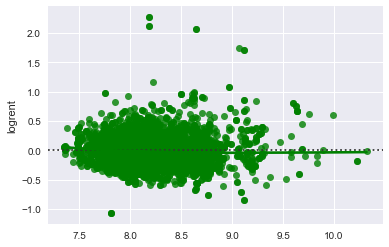

In [29]:
x = log_ols.predict()
y = df.logrent

sns.residplot(x, y, lowess=True, color="g")

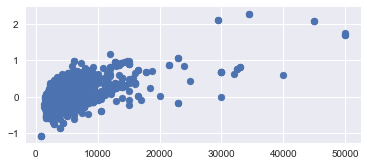

In [30]:
# checking for our model - Homoscedasticity
pred_val = x
true_val = y
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(df['rent'],residual)

((array([-3.70209812, -3.47074294, -3.34342775, ...,  3.34342775,
          3.47074294,  3.70209812]),
  array([-1.06516263, -1.06516263, -1.06516263, ...,  2.11046973,
          2.26703388,  2.26703388])),
 (0.22496716221923843, 6.209158768697574e-11, 0.9675861955306809))

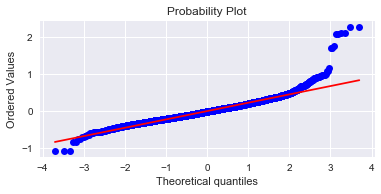

In [31]:
import scipy as sp

# checking for normality - QQ plot 
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(residual, plot=ax, fit=True)
